In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import requests
import io

C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


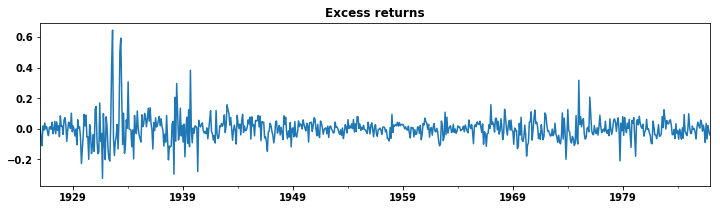

In [3]:
ew_excs = requests.get(
    'http://econ.korea.ac.kr/~cjkim/MARKOV/data/ew_excs.prn').content
raw = pd.read_table(io.BytesIO(ew_excs),
                    header=None, 
                    skipfooter=1, 
                    engine='python')
raw.index = pd.date_range('1926-01-01', '1995-12-01', freq='MS')

quotes = raw.loc[:'1986'] - raw.loc[:'1986'].mean()

# 収益率データの表示
quotes[0].plot(title='Excess returns', figsize=(12, 3))

## hmmlearn

In [4]:
import datetime
from hmmlearn.hmm import GaussianHMM

In [5]:
model = GaussianHMM(
    n_components=3, covariance_type="full", n_iter=5000).fit(quotes)

In [6]:
hidden_states = model.predict(quotes)

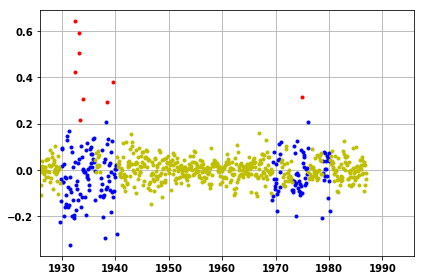

In [7]:
colors = ['b', 'Y', 'r']

for i, color in enumerate(colors):
    mask = hidden_states != i
    tmp = quotes.copy()
    tmp[mask] = None
    plt.plot(tmp, ".", c=color)

plt.xlim('1926-01-01', '1995-12-01')
plt.grid(True)
plt.tight_layout()